In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import lmfit
import astropy
import astropy.units as u
import corner
from astropy.cosmology import Flatw0waCDM

In [3]:
# Astropy.cosmology version.Here I am using FlatwowaCDM because it has less parameters.(no Ode)
def Hz1(z1,H01,Om1,w01,wa1):
    cosmo =Flatw0waCDM(H0=H01* u.km / u.s / u.Mpc, Om0=Om1,w0=w01,wa=wa1) 
    #the redshift dependence of the dark energy density:
    I = cosmo.de_density_scale(z1)
    E = np.sqrt((Om1*(1+z1)**3.) + (1.-Om1)*I)
    HZ1 = H01*E
    return HZ1

In [5]:
# load the column names for the samples
column_names_raw = np.loadtxt('base_plikHM_EE_lowE_post_zre6p5.paramnames', dtype=np.str, usecols=[0])
column_names = [x.replace("b'",'').replace("'",'') for x in column_names_raw]


In [6]:
# make a data frame with column names and samples
samples1 = pd.DataFrame(samples[:,2:], columns=column_names) # first two columns are not important

In [9]:
# define which parameters to use
use_params = ['omegam*', 'omegabh2','H0*']

<Figure size 432x288 with 0 Axes>

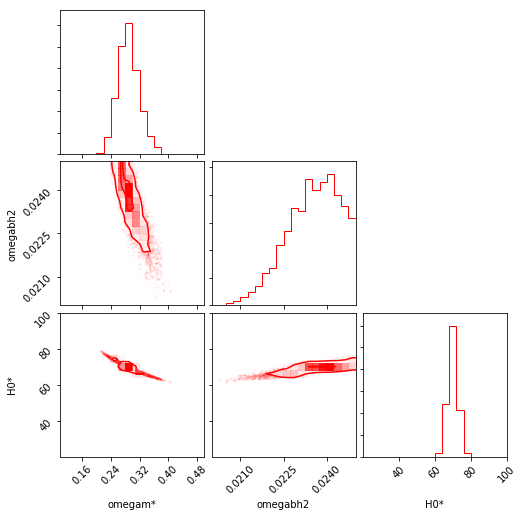

In [10]:
pl.figure()
sigma1 = 1. - exp(-(1./1.)**2/2.)
sigma2 = 1. - exp(-(2./1.)**2/2.)
_=corner(samples1[use_params], range=[(0.1, 0.5), (0.02, 0.025),(20.,100.)], bins=20, levels=(sigma1, sigma2), color='r')
